<a href="https://colab.research.google.com/github/dav1552/hjkk/blob/main/Copy_of_Himanshu_KRMU_Final_Combined__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K.R. Mangalam University , Gurugram

---






# Himanshu KRMU Group




# Stock Price Prediction Project



1.   ***Himanshu Kumar*** - ***Team Leader***  




* Work Done           ( Linear Regression , Random Forest )
2.   Aman Mathur - Team Member
* Work Done ( KNN - Nearest Neighbours, KNN - Clustering)
3.   Ankit Paul - Team Member
* Work Done ( Artificial Neural Network, Decision Tree)
4.   Parv Khandelwal - Team Member
* Work Done ( Logistic Regression, Naive Baives)
5.   Subodh Kumar Gupta - Team Member
* Work Done ( Convolutional Neural Network              ,  
    Long Short Term Memory )



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


## Dataset Splitting With The Help Of Pandas, Numpy & Matplotlib

In [ ]:
# install  modules
!pip install numpy pandas matplotlib scikit-learn


In [ ]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import LSTM, Dense




In [ ]:
! pip install tensorflow

In [ ]:
! pip install keras

In [ ]:
# Load the dataset (assuming it's in CSV format with a 'Date' and 'Close' column)
df = pd.read_csv('/content/drive/MyDrive/College documents /AAPL')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [ ]:
df.head()

,Unnamed: 0,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,,
2015-05-27 00:00:00+00:00,0,AAPL,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
2015-05-28 00:00:00+00:00,1,AAPL,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2015-05-29 00:00:00+00:00,2,AAPL,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
2015-06-01 00:00:00+00:00,3,AAPL,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
2015-06-02 00:00:00+00:00,4,AAPL,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-27 00:00:00+00:00 to 2020-05-22 00:00:00+00:00
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 147.4+ KB


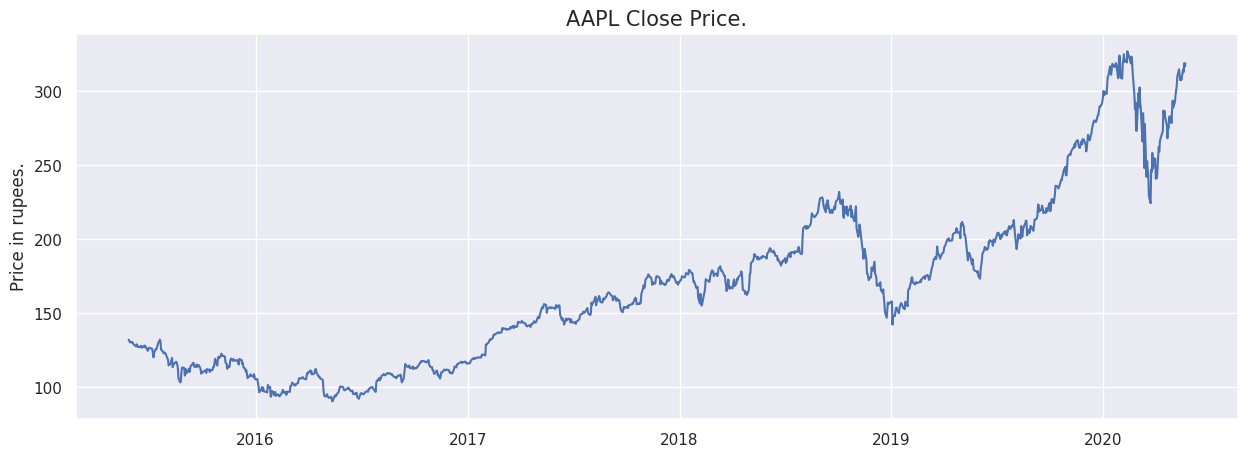

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('AAPL Close Price.',fontsize=15)
plt.ylabel('Price in rupees.')
plt.show()

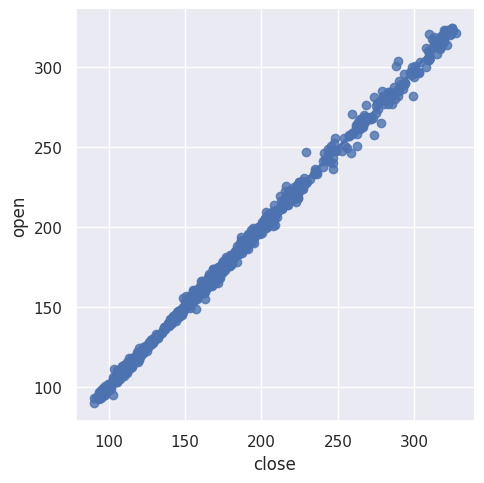

In [ ]:
# Exploring the Data Scatter
 # Plotting the data scatter

sns.lmplot(x ="close",y = "open", data = df, order = 8, ci=None)

In [ ]:
# Data Cleaning
# Eliminating NaN or missing input numbers

df.fillna(method ='ffill', inplace = False)

,Unnamed: 0,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,,
2015-05-27 00:00:00+00:00,0,AAPL,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
2015-05-28 00:00:00+00:00,1,AAPL,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2015-05-29 00:00:00+00:00,2,AAPL,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
2015-06-01 00:00:00+00:00,3,AAPL,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
2015-06-02 00:00:00+00:00,4,AAPL,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18 00:00:00+00:00,1253,AAPL,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
2020-05-19 00:00:00+00:00,1254,AAPL,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
2020-05-20 00:00:00+00:00,1255,AAPL,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0


In [ ]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

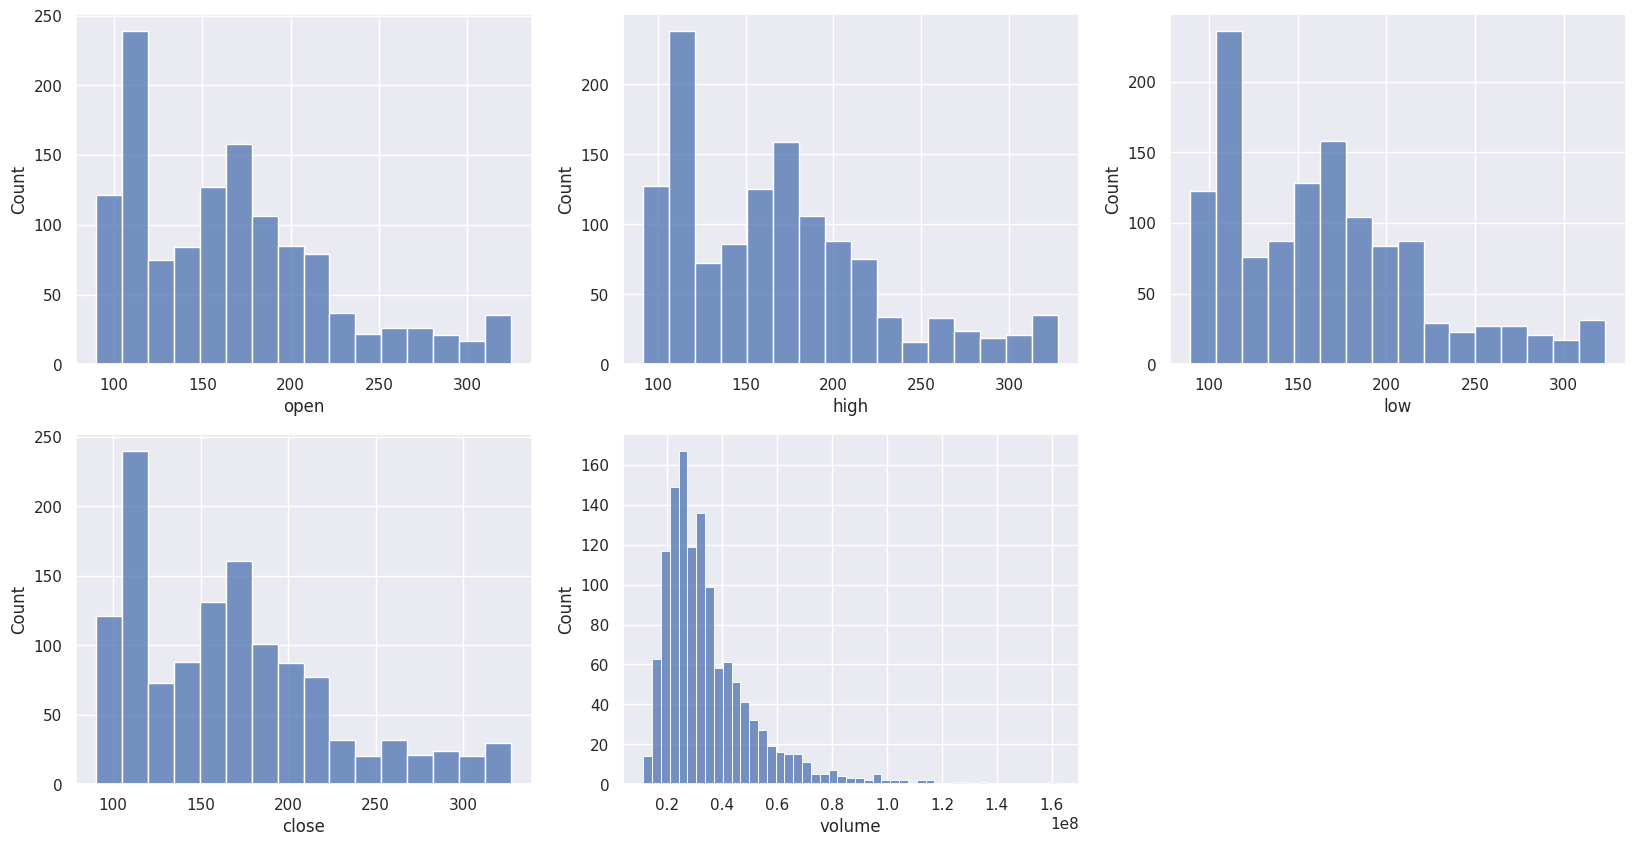

In [ ]:
# Histogram
features=['open','high','low','close','volume']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(df[col])
plt.show()

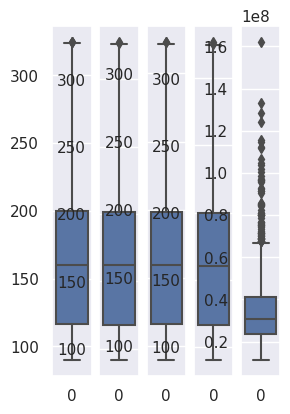

In [ ]:
# Boxplot
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,33,i+1)
  sns.boxplot(df[col])
plt.show()

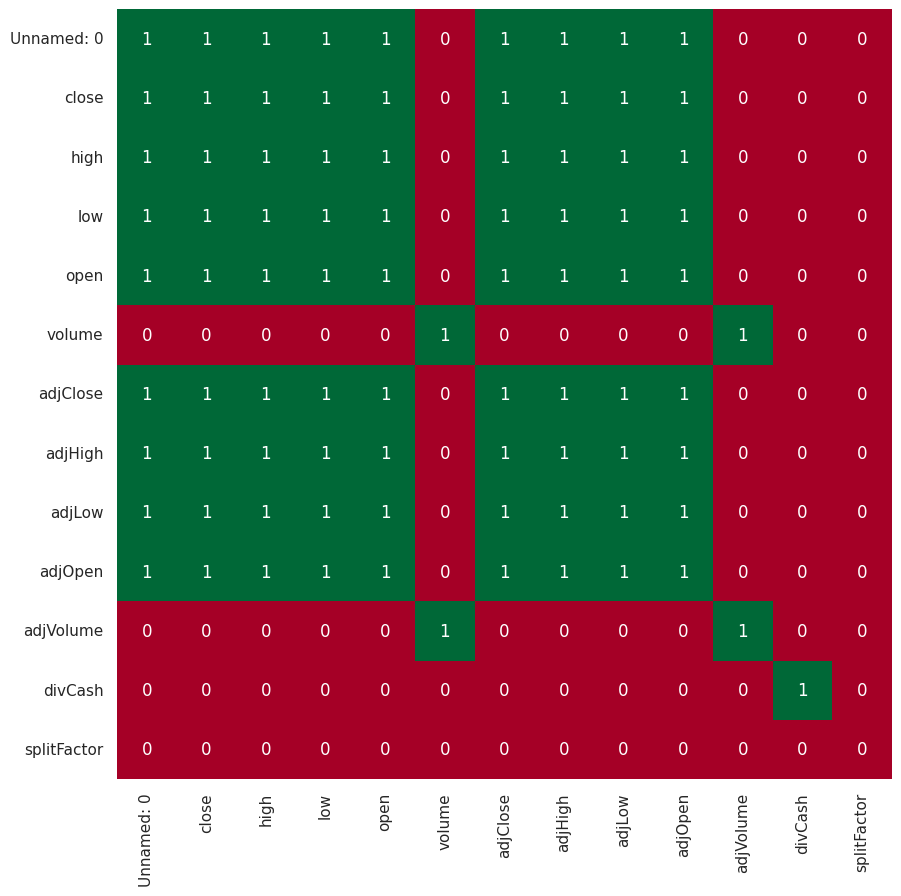

In [ ]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.8,annot=True,cbar=False,cmap='RdYlGn')
plt.show()



---
## Linear Regression


In [ ]:
# Normalize the data (optional but recommended for linear regression)
df['close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())

In [ ]:
# Define the time window for input data and the number of steps to predict ahead
window_size = 30
prediction_steps = 1

In [ ]:
# Create input sequences and labels (same as before)
X = []
y = []
for i in range(len(df) - window_size - prediction_steps):
    X.append(df['close'].values[i:i+window_size])
    y.append(df['close'].values[i+window_size+prediction_steps-1])

X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the linear regression model
model = LinearRegression()


In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score (R2)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.00037849108785644765
R-squared Score: 0.9942161120266221


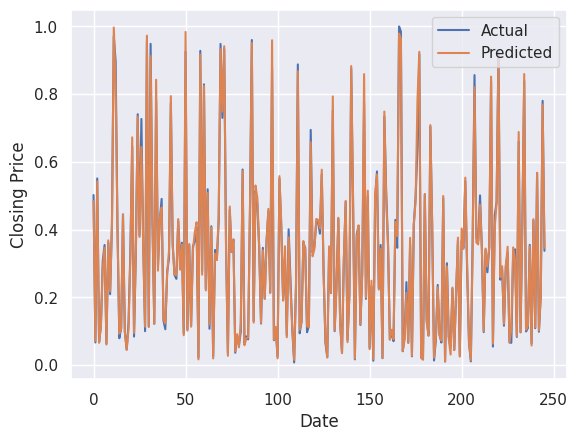

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared score (R2)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.00037849108785644765
R-squared Score: 0.9942161120266221




---
## Random Forest


In [ ]:
# Normalize the data (optional but recommended for some models)
df['close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())

In [ ]:
# Define the time window for input data and the number of steps to predict ahead
window_size = 30
prediction_steps = 1


In [ ]:
# Create input sequences and labels (same as before)
X = []
y = []
for i in range(len(df) - window_size - prediction_steps):
    X.append(df['close'].values[i:i+window_size])
    y.append(df['close'].values[i+window_size+prediction_steps-1])

X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Spliting Data into X and y
X = df.iloc[:, 4:13].values
y = df.iloc[:, 3].values

In [ ]:
# Initialize and train the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0003830955746392461


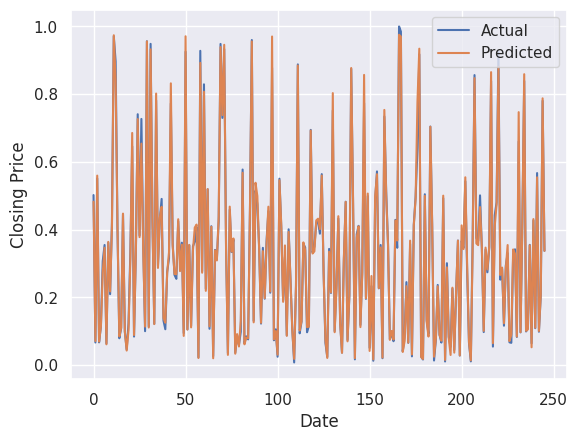

In [ ]:
# Plot the predicted and actual stock prices
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()




---


## Logistics Regression

In [ ]:
# Defining the model
df['open-close']=df['open']-df['close']
df['low-high']=df['low']-df['high']
df['target']=np.where(df['close'].shift(-1)>df['close'],1,0)

In [ ]:
# Training and testing of  model
features=df[['open-close','low-high']]
target=df['target']
scaler=StandardScaler()
features=scaler.fit_transform(features)
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.1,random_state=2022)
print(x_train.shape,x_test.shape)

(1132, 2) (126, 2)


In [ ]:
# Accuracy and prediction
models=[LogisticRegression()]
for i in range(1):
  models[i].fit(x_train,y_train)
  print(f'{models[i]}:')
  print('Training Accuracy:',metrics.roc_auc_score(y_train,models[i].predict_proba(x_train)[:,1]))
  print('Testing Accuracy:',metrics.roc_auc_score(y_test,models[i].predict_proba(x_test)[:,1]))
  print()

LogisticRegression():
Training Accuracy: 0.5221993135748857
Testing Accuracy: 0.483683278522641





---


## Naive Baives
* Bernoulli Naive Baives

In [ ]:
# Defining the data
# Defining X
x=np.array([[1,1,1,1,1],
            [0,0,0,0,0]])
print('x:',x)

x: [[1 1 1 1 1]
 [0 0 0 0 0]]


In [ ]:
# Defining the data
# Defining Y
y=np.array([1,2])
print('y:',y)
y=y.ravel()

y: [1 2]


In [ ]:
# Fit the data
ber=BernoulliNB()
ber.fit(x,y)

BernoulliNB()

In [ ]:
# Testing of data
x_test=np.array([[0,0,0,0,0]])
prediction=ber.predict(x_test)

In [ ]:
# Prediction
print('Prediction:',prediction)

Prediction: [2]




---


## KNN Clustering

In [ ]:
# Define a Normalizer
normalizer = Normalizer()
norm_X_train = normalizer.fit_transform(X_train)
norm_X_test = normalizer.fit_transform(X_test)

In [ ]:
# Create Kmeans model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, max_iter = 1000)

In [ ]:
# Create a pipeline with StandardScaler and KMeans
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=23))
pipeline.fit(X_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=23))])

In [ ]:
Y = pipeline.predict(X_test)
Y

array([2, 0, 2, 0, 0, 4, 4, 0, 4, 4, 4, 3, 3, 2, 0, 0, 2, 0, 0, 0, 4, 2,
       0, 4, 1, 4, 1, 4, 0, 3, 0, 1, 2, 0, 3, 4, 2, 2, 0, 0, 4, 4, 3, 4,
       4, 4, 2, 4, 4, 0, 3, 0, 4, 0, 4, 2, 4, 0, 1, 4, 1, 4, 2, 0, 4, 0,
       4, 4, 4, 1, 1, 1, 4, 0, 2, 4, 4, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 0,
       2, 2, 4, 0, 4, 0, 4, 2, 4, 3, 0, 0, 0, 2, 4, 0, 4, 0, 2, 4, 0, 0,
       4, 1, 0, 0, 4, 4, 0, 0, 1, 4, 4, 2, 2, 2, 2, 4, 0, 0, 4, 0, 1, 0,
       4, 2, 0, 0, 4, 2, 0, 0, 1, 2, 0, 4, 4, 0, 4, 3, 0, 2, 0, 4, 0, 2,
       2, 4, 4, 0, 1, 2, 4, 0, 0, 0, 4, 2, 3, 3, 0, 0, 4, 0, 4, 0, 4, 2,
       3, 1, 0, 0, 2, 0, 0, 1, 4, 0, 0, 4, 0, 0, 2, 0, 4, 0, 0, 4, 0, 4,
       2, 0, 2, 4, 2, 4, 0, 0, 2, 1, 4, 4, 2, 4, 0, 4, 4, 4, 3, 0, 4, 2,
       1, 4, 4, 0, 4, 2, 0, 0, 4, 4, 0, 3, 0, 2, 1, 0, 0, 4, 0, 2, 0, 2,
       0, 0, 1, 4], dtype=int32)

In [ ]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_test)

  wcss.append(kmeans.inertia_)

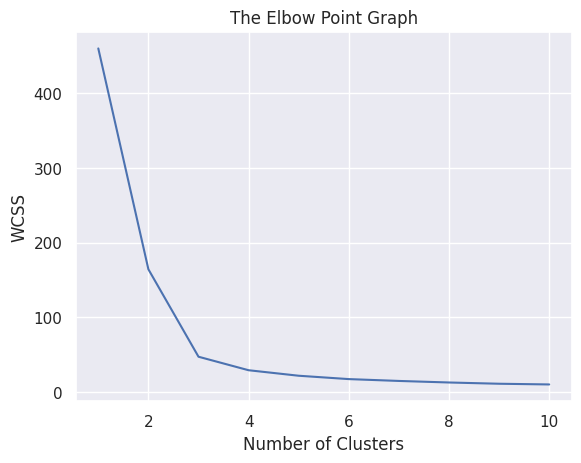

In [ ]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

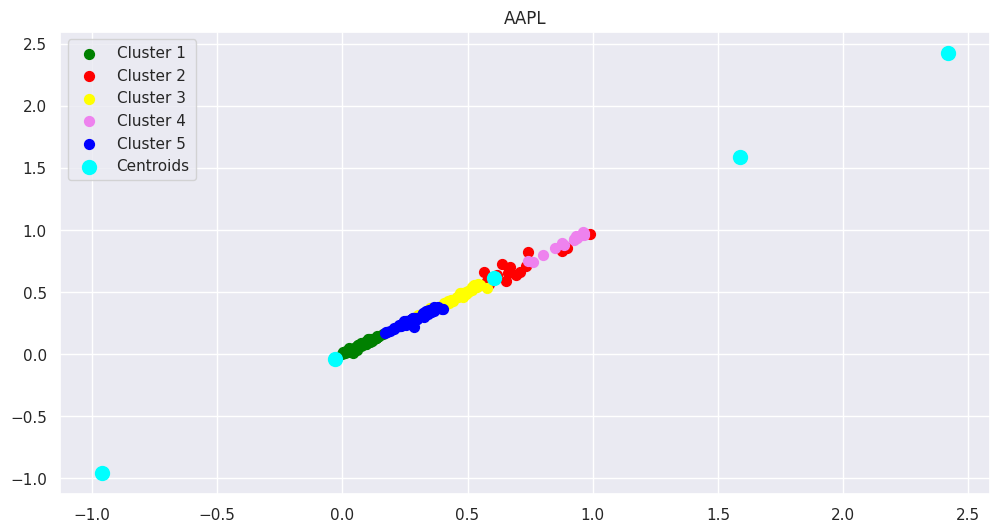

In [ ]:
# Visualizing all the Clusters
# plotting all the clusters and their Centroids
plt.figure(figsize=(12, 6))
plt.scatter(X_test[Y == 0, 0], X_test[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_test[Y == 1, 0], X_test[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_test[Y == 2, 0], X_test[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_test[Y == 3, 0], X_test[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_test[Y == 4, 0], X_test[Y == 4, 1], s=50, c='blue', label='Cluster 5')

# plot the centroids
centroids = pipeline.named_steps['kmeans'].cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='cyan', label='Centroids')

plt.title('AAPL')
plt.legend()
plt.show()



---


## KNN Regressors

In [ ]:
# Spliting Data into X and y
X = df.iloc[:, 4:13].values
y = df.iloc[:, 3].values

# Spliting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
# Standardize the feature variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Create a KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predict the test set
y_pred = knn.predict(X_test)
y_pred

array([162.722  , 219.448  , 115.47   , 155.524  , 156.536  , 118.54   ,
       127.492  , 118.79   , 300.38998, 185.052  , 228.042  , 100.108  ,
       115.0285 , 198.5718 ,  97.04714, 253.278  , 113.416  , 199.456  ,
       235.76794, 175.81572, 171.952  , 284.794  , 191.092  , 160.91198,
       184.034  , 171.787  , 113.137  , 183.638  , 182.19568, 323.594  ,
       109.982  , 119.13132, 221.702  , 320.802  , 200.6678 , 224.602  ,
       113.272  , 145.66796, 113.309  , 193.14   , 104.696  , 123.996  ,
       179.1933 ,  98.22674, 100.23398, 177.913  , 140.59674, 186.496  ,
       297.575  , 113.96   , 304.38598, 162.696  , 177.085  , 194.288  ,
       183.565  ,  97.26598, 173.92652, 158.134  , 108.67   , 265.36   ,
       129.304  , 144.436  , 197.74   ,  98.57714, 110.09   , 116.934  ,
       143.856  , 122.501  , 107.884  , 177.052  , 175.83972, 268.494  ,
       199.442  , 172.646  , 118.064  , 114.4599 , 179.24   , 109.674  ,
       324.548  , 174.454  , 210.562  , 120.268  , 

In [ ]:
# Prediction and Accuracy
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

21.501147671744455

In [ ]:
# Accuracy Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9933610911141657



---


# Artificial Neural Network





In [ ]:
# Spliting Data
X = df.iloc[:, 4:13]
y = df.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer, predicting a single value (stock price)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 1541912264704.0000 - val_loss: 85726052352.0000
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 42940076032.0000 - val_loss: 724924928.0000
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1317293184.0000 - val_loss: 74150504.0000
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 53046228.0000 - val_loss: 9770450.0000
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1810748.2500 - val_loss: 30040.7656
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 72573.7500 - val_loss: 31356.3613
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 13751.2119 - val_loss: 9484.7090
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 9846.1963 - val_loss: 9027.1807
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 9681.6357 - val_loss: 9262.1367
Epoch 10/10

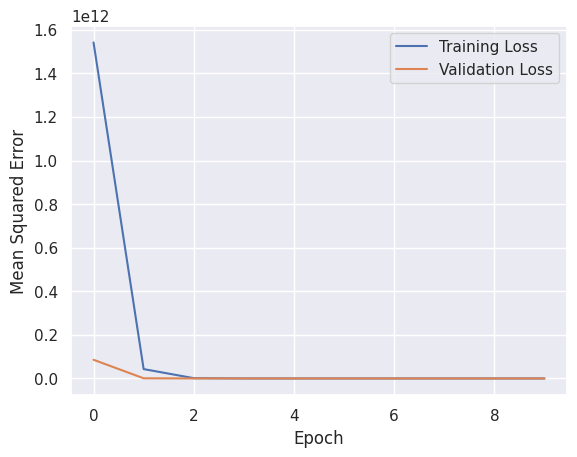

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

8/8 [==============================] - 0s 2ms/step


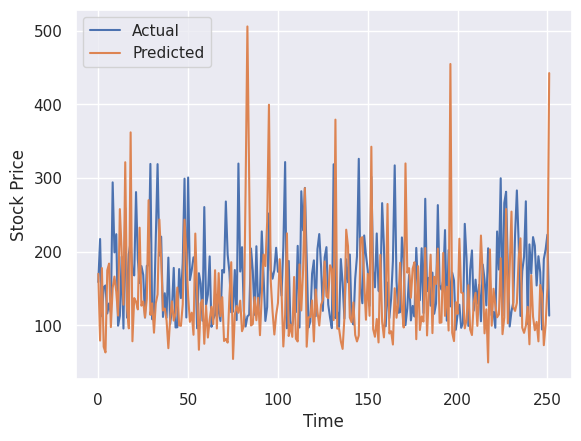

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs. predicted stock prices
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



---
## Decision Tree


In [ ]:
df.shape

(1258, 17)

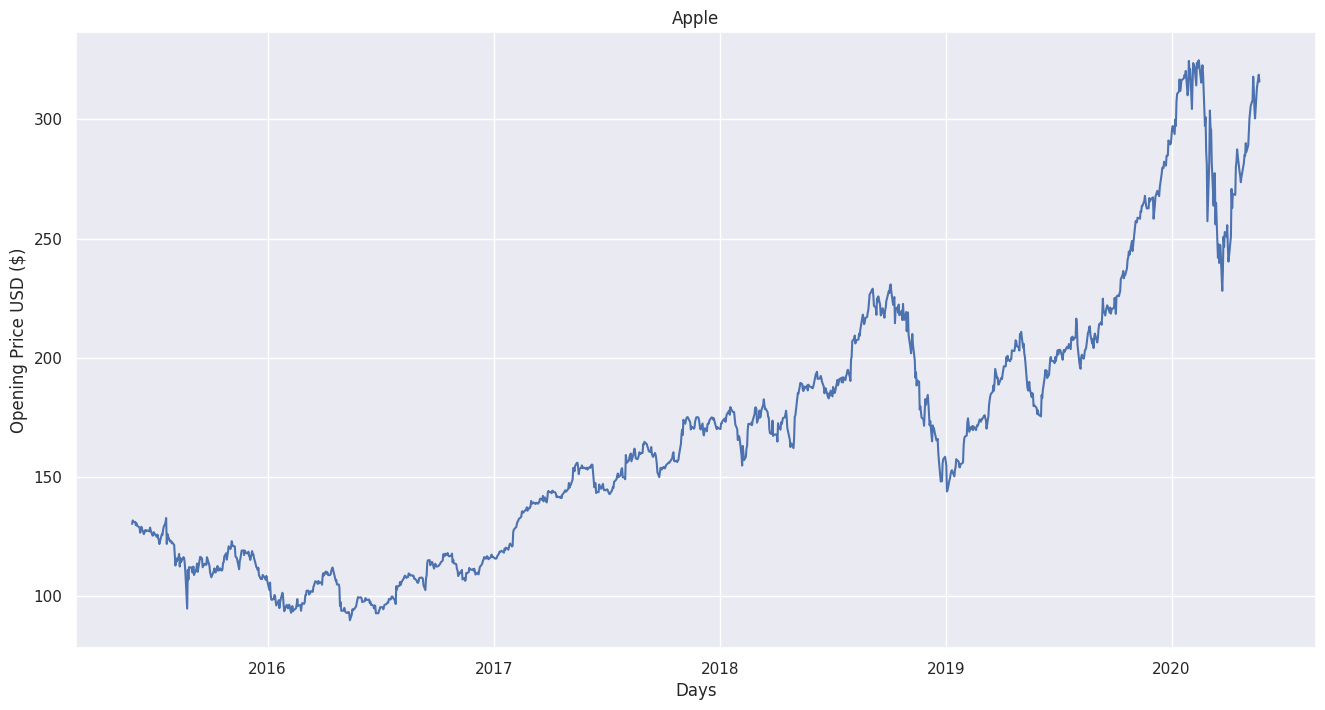

In [ ]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

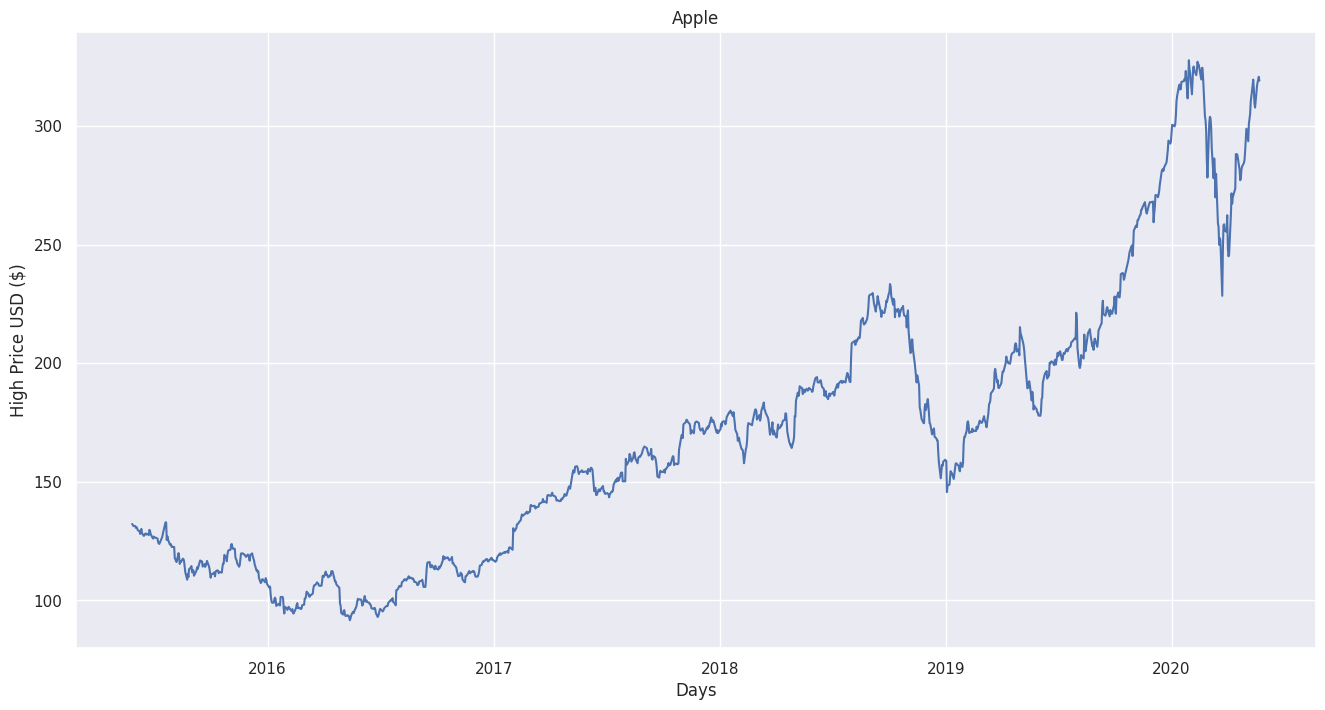

In [ ]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

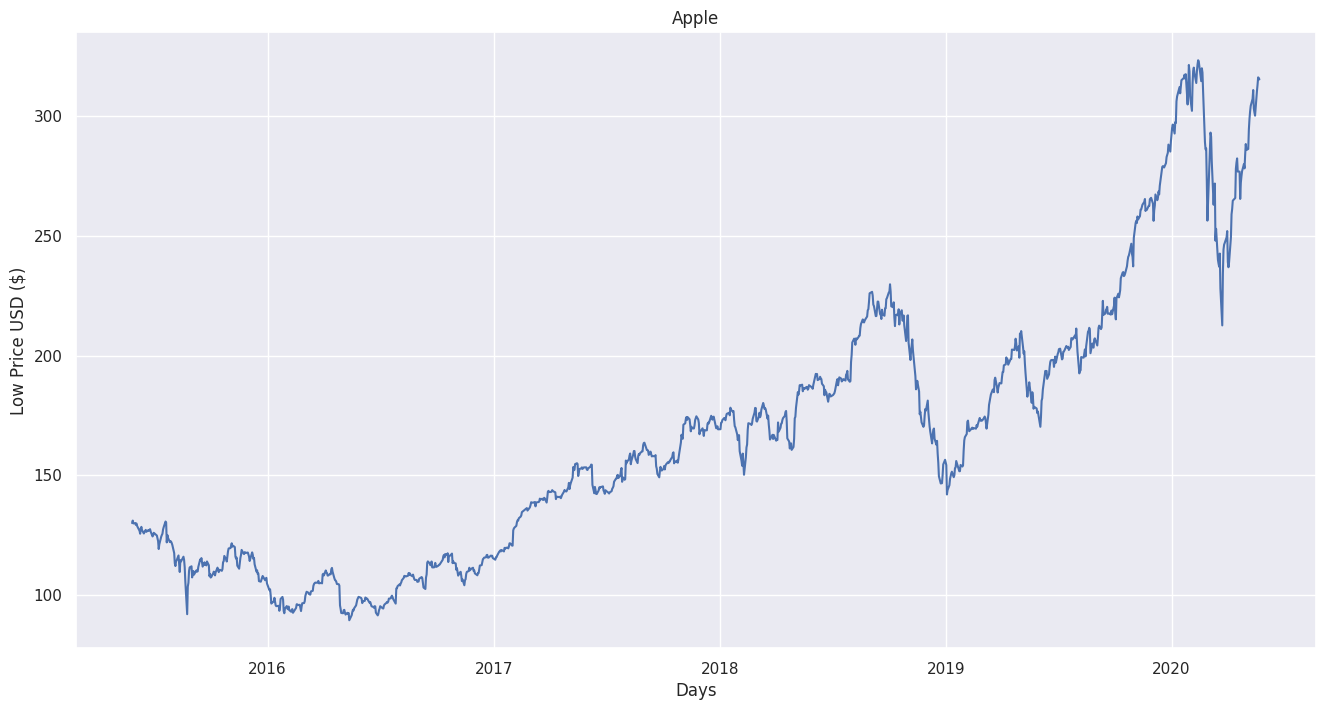

In [ ]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

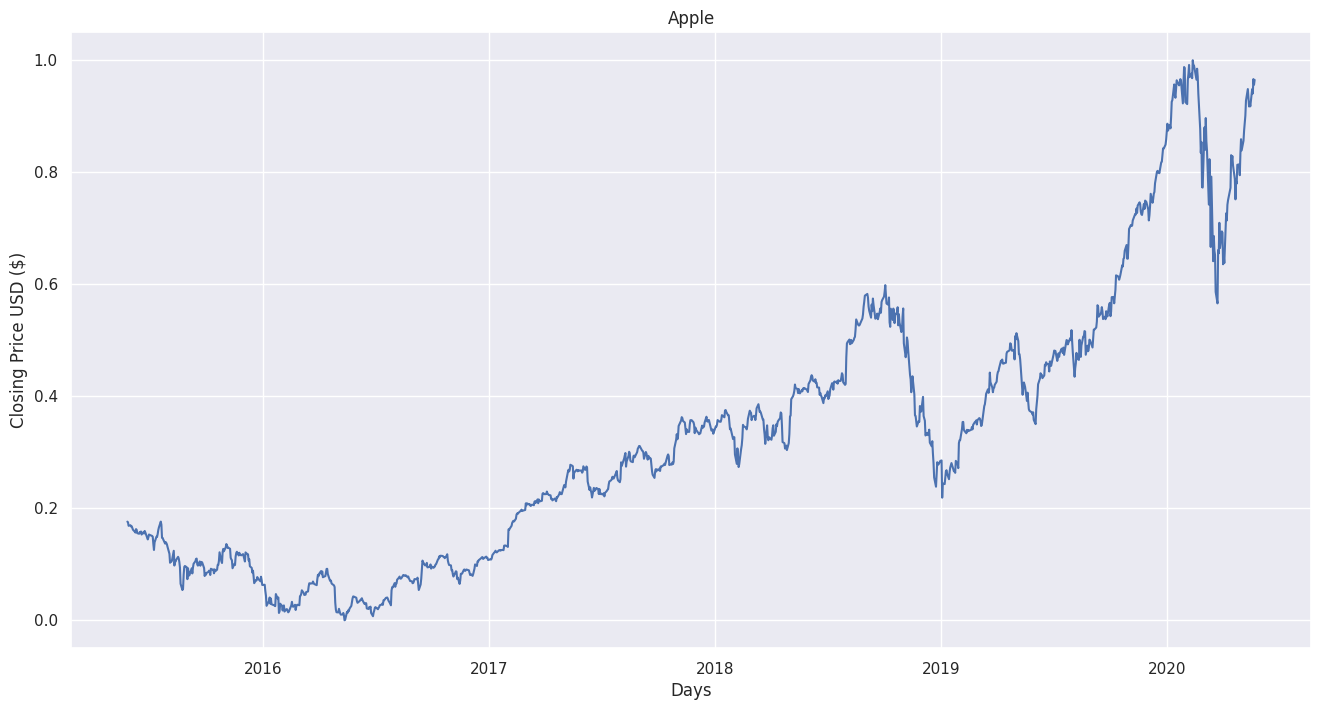

In [ ]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [ ]:
df2 = df['close']

In [ ]:
df2.tail()

date
2020-05-18 00:00:00+00:00    0.948324
2020-05-19 00:00:00+00:00    0.940640
2020-05-20 00:00:00+00:00    0.966351
2020-05-21 00:00:00+00:00    0.956303
2020-05-22 00:00:00+00:00    0.964916
Name: close, dtype: float64

In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [ ]:
df2.tail()

,close,Prediction
date,,
2020-05-18 00:00:00+00:00,0.948324,NaN
2020-05-19 00:00:00+00:00,0.940640,NaN
2020-05-20 00:00:00+00:00,0.966351,NaN
2020-05-21 00:00:00+00:00,0.956303,NaN
2020-05-22 00:00:00+00:00,0.964916,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.84256523]
 [0.84210082]
 [0.84936249]]


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[0.0873934  0.09030651 0.09891919 ... 0.96635143 0.9563033  0.96491598]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[0.47745504],
       [0.46715359],
       [0.46500042],
       [0.50084438],
       [0.47458414],
       [0.47032002],
       [0.49041628],
       [0.50667061],
       [0.50671283],
       [0.51633877],
       [0.51557882],
       [0.47411973],
       [0.49037406],
       [0.48053703],
       [0.48632103],
       [0.50101326],
       [0.49987334],
       [0.48703876],
       [0.5017732 ],
       [0.51904078],
       [0.51895635],
       [0.52279828],
       [0.53347969],
       [0.56256861],
       [0.56043654],
       [0.54213459],
       [0.54698978],
       [0.55036731],
       [0.55910665],
       [0.551465  ],
       [0.53782825],
       [0.54200794],
       [0.53761716],
       [0.55176053],
       [0.54694756],
       [0.54243013],
       [0.56417293],
       [0.56679051],
       [0.54302119],
       [0.55087393],
       [0.57700751],
       [0.57721861],
       [0.56598835],
       [0.57709195],
       [0.59001098],
       [0.61584902],
       [0.61441358],
       [0.612

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[0.76150469 0.8866419  0.87431394 0.88431985 0.87836697 0.73385122
 0.96424048 0.92877649 0.95676771 0.93304061 0.93304061 0.94950604
 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027
 0.2781812  0.98792536 0.98594106 0.92531453 0.92172591 0.96474711
 0.97572406 0.99159841 0.96972895 0.97614625 0.41298657 1.
 0.99016297 0.99050072 0.99016297 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.41535084 0.77336823 0.77269273 0.88014017
 0.84007431 0.77269273 0.85527316 0.83884995 0.74233725 0.82327113
 0.6665963  0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66001013 0.66001013 0.70970193
 0.66452757 0.63569197 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.78426074 0.75002111 0.85898843 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.8194292  0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.77974331 0.88782403 0.90095415 0.90095415
 0.

In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[0.558921   0.54769251 0.54534557 0.58441519 0.55579175 0.55114389
 0.57304865 0.59076573 0.59081175 0.60130395 0.60047561 0.55528555
 0.57300263 0.56228034 0.56858486 0.58459927 0.58335677 0.56936718
 0.5854276  0.60424912 0.60415709 0.60834476 0.61998741 0.65169409
 0.64937016 0.62942119 0.6347133  0.63839477 0.64792058 0.63959125
 0.62472731 0.62928313 0.62449722 0.63991338 0.63466728 0.62974332
 0.65344279 0.65629593 0.63038757 0.638947   0.66743238 0.66766248
 0.65542158 0.66752442 0.68160605 0.70976931 0.70820468 0.70567367
 0.70130192 0.7054896  0.71068968 0.72955722 0.72702621 0.74184413
 0.74368487 0.75749039 0.76885693 0.74235034 0.74221228 0.7675224
 0.80001139 0.80774248 0.8060398  0.806546   0.81662403 0.81989134
 0.82937113 0.82826669 0.8398173  0.83139594 0.84575368 0.85192014
 0.84819265 0.83392695 0.82849678 0.82743835 0.8485608  0.83898897
 0.8553255  0.85261042 0.83839073 0.81671607 0.82725428 0.84492535
 0.86853278 0.85109181 0.85827068 0.86880889 0.87198416 0.88896

In [ ]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

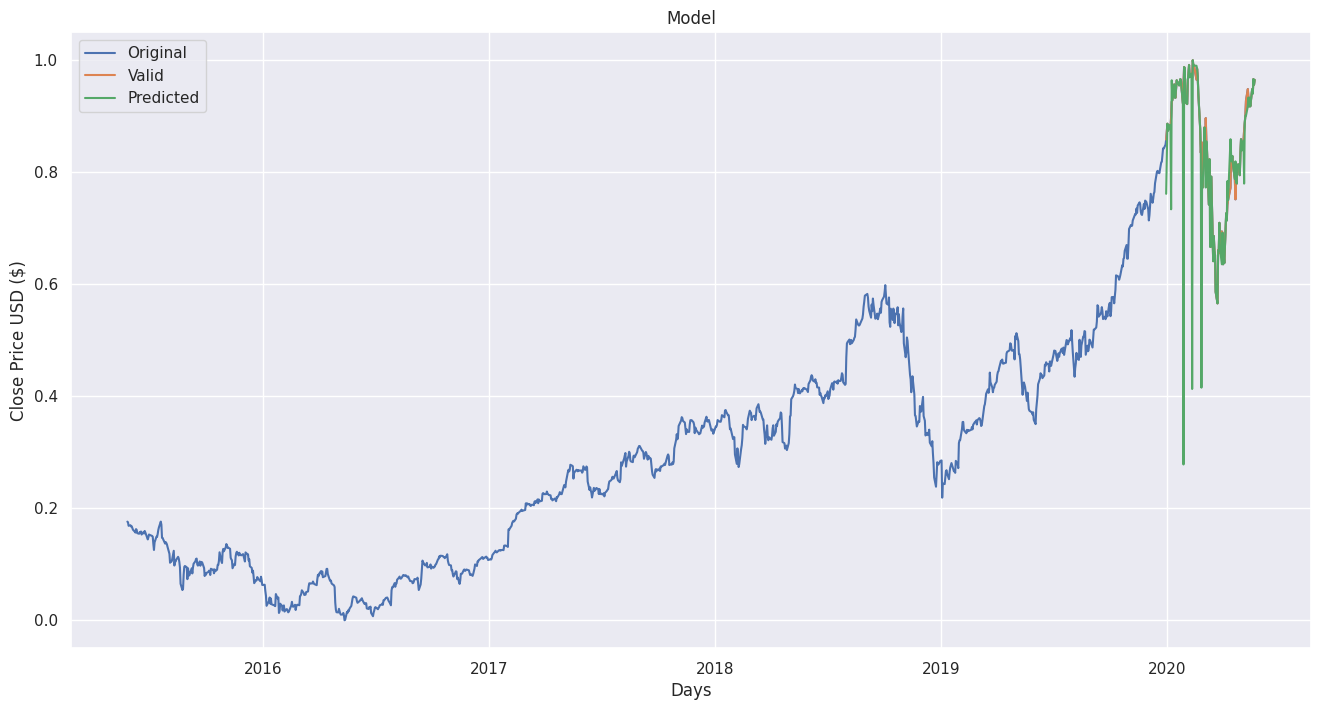

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()



---
## Convolutional Neural Network


In [ ]:
!pip install  tensorflow

In [ ]:
# Normalize the data (optional but recommended for neural networks)
df['close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())

In [ ]:
# Define the time window for input data and the number of steps to predict ahead
window_size = 30
prediction_steps = 1

In [ ]:
# Create input sequences and labels
X = []
y = []
for i in range(len(df) - window_size - prediction_steps):
    X.append(df['close'].values[i:i+window_size])
    y.append(df['close'].values[i+window_size+prediction_steps-1])

X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Define and compile the CNN model:

# Reshape the data for CNN input (CNN requires 3D input, i.e., [samples, timesteps, features])
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
#Train the model:

epochs = 12
batch_size = 32

history = model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/12
25/25 [==============================] - 1s 12ms/step - loss: 0.0196 - val_loss: 0.0061
Epoch 2/12
25/25 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 3/12
25/25 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 4/12
25/25 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 5/12
25/25 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/12
25/25 [==============================] - 0s 7ms/step - loss: 9.4881e-04 - val_loss: 0.0012
Epoch 7/12
25/25 [==============================] - 0s 6ms/step - loss: 8.0895e-04 - val_loss: 0.0013
Epoch 8/12
25/25 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/12
25/25 [==============================] - 0s 6ms/step - loss: 7.1759e-04 - val_loss: 0.0012
Epoch 10/12
25/25 [==============================] - 0s 6ms/step - loss: 7.2419e-04 - val_loss: 8.4529e-0

In [ ]:
# Evaluate the model on the test set:

test_loss = model.evaluate(X_test_cnn, y_test)

print(f"Test Loss: {test_loss}")

8/8 [==============================] - 0s 3ms/step - loss: 8.9407e-04
Test Loss: 0.0008940714178606868


In [ ]:
#Make predictions:

# Reshape the test data for prediction
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_cnn)

8/8 [==============================] - 0s 3ms/step


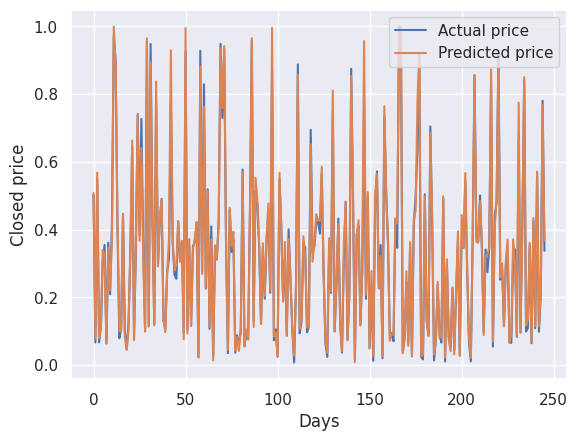

In [ ]:
# Plot the predicted and actual stock prices
plt.plot(y_test, label='Actual price')
plt.plot(predictions, label='Predicted price')
plt.xlabel('Days')
plt.ylabel('Closed price')
plt.legend()
plt.show()

In [ ]:
#After training the model and making predictions, calculate the Mean Squared Error (MSE):

# Make predictions on the test set
predictions = model.predict(X_test_cnn)

8/8 [==============================] - 0s 4ms/step


In [ ]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 0.0008940714576132343




---
## Long Short Term Memory


In [ ]:
# Normalize the data (optional but recommended for neural networks)
df['close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())

In [ ]:
# Define the time window for input data and the number of steps to predict ahead
window_size = 30
prediction_steps = 1

In [ ]:
# Create input sequences and labels (same as before)
X = []
y = []
for i in range(len(df) - window_size - prediction_steps):
    X.append(df['close'].values[i:i+window_size])
    y.append(df['close'].values[i+window_size+prediction_steps-1])

X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training and testing sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape the data for LSTM input (LSTM requires 3D input, i.e., [samples, timesteps, features])
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


In [ ]:
epochs = 8
batch_size = 32

history = model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/8
25/25 [==============================] - 5s 66ms/step - loss: 0.1006 - val_loss: 0.0094
Epoch 2/8
25/25 [==============================] - 1s 37ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 3/8
25/25 [==============================] - 1s 39ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 4/8
25/25 [==============================] - 1s 43ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/8
25/25 [==============================] - 1s 37ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/8
25/25 [==============================] - 1s 22ms/step - loss: 8.0792e-04 - val_loss: 0.0011
Epoch 7/8
25/25 [==============================] - 1s 23ms/step - loss: 7.6487e-04 - val_loss: 9.9256e-04
Epoch 8/8
25/25 [==============================] - 1s 25ms/step - loss: 6.6368e-04 - val_loss: 8.2810e-04


In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_lstm, y_test)
predictions = model.predict(X_test_lstm)
print(f"Test Loss: {test_loss}")


8/8 [==============================] - 0s 9ms/step
Test Loss: 0.0008714126306585968


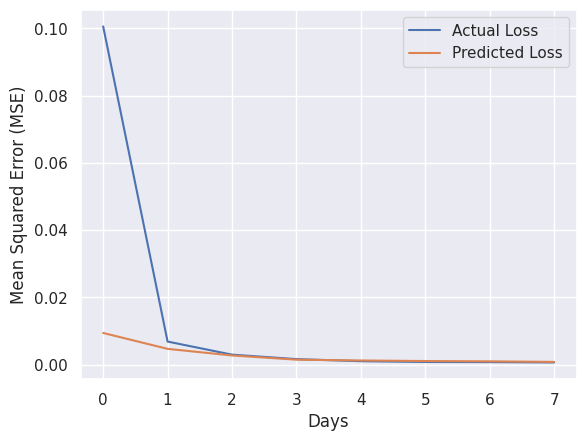

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Actual Loss')
plt.plot(history.history['val_loss'], label='Predicted Loss')
plt.xlabel('Days')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

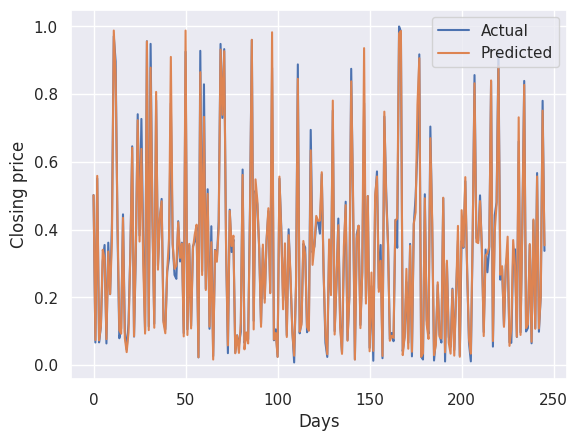

In [ ]:
# Plot the predicted and actual stock prices
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_lstm)

8/8 [==============================] - 0s 9ms/step


In [ ]:
# Define a threshold for accuracy calculation (e.g., 0.01 or 1%)
threshold = 0.01


In [ ]:
# Calculate accuracy within the threshold
correct_predictions = np.abs(predictions - y_test) <= threshold
accuracy = np.mean(correct_predictions)

print(f"Accuracy within {threshold*100}% threshold: {accuracy*100}%")

Accuracy within 1.0% threshold: 4.063388194857558%
